In [2]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

Exploring the Dataset

In [3]:
df = pd.read_csv ('C://Users//BIDISHA//Downloads//Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# changing the type of the customers ID from integer to a string variable

df['CustomerID']=df['CustomerID'].astype(str)

In [8]:
df.dtypes

CustomerID                object
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
df.isnull().sum()

# No null Values are found in the dataset

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


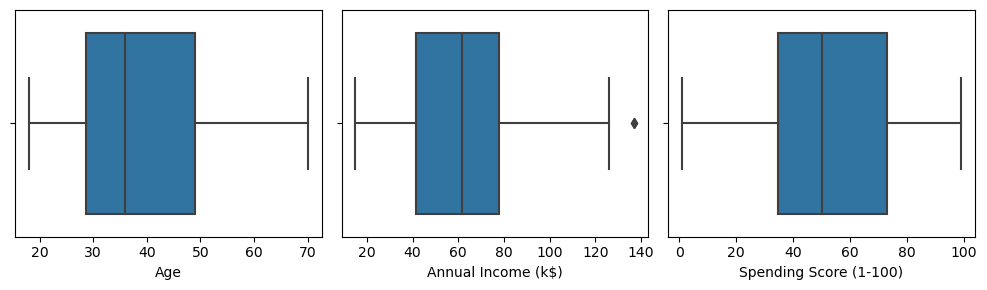

In [11]:
# checking for outliers.

fig, axs = plt.subplots(1,3, figsize = (10,3))
a = sns.boxplot(data=df,x='Age', ax = axs[0])
b = sns.boxplot(data=df,x='Annual Income (k$)', ax = axs[1])
c = sns.boxplot(data=df,x='Spending Score (1-100)', ax = axs[2])

plt.tight_layout()

# no outliers in the dataset (except for one in income which can be ignored)

In [24]:
#Among the given features, the annual income and spending score 
#seems enoungh to divide the customers into groups for our objective.
#We can assume that gender and age won't play a role in deciding the target 
#customers group. so it is better to take only the relevant features
#to avoid redundancy.


In [13]:
# we'll take only the last 2 columns for our analysis

X = df.loc[:,['Annual Income (k$)','Spending Score (1-100)']]


In [14]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [15]:
# for the clustering part we'll need the values of this dataframe only.

X = X.values

In [16]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [17]:
# Choosing the optimal number of clusters.
# we will use the Within Clusters Sum of squares (WCSS).
# and finally choose that number of clusters that would give us the minimum WCSS by using the Elbow method.
# we have used K-Means++ as our initialization method.

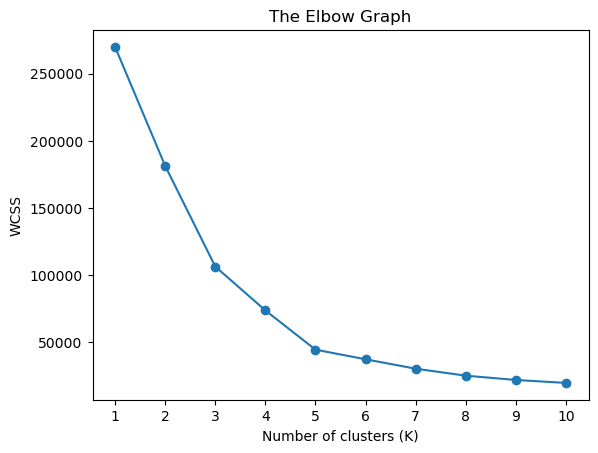

In [23]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# plotting the Elbow-curve

plt.plot(range(1,11), wcss, marker = 'o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.title('The Elbow Graph')
plt.xticks(range(1,11))
plt.show()


Training the K=Means Clustering model with optimum K=5.

In [19]:
kmeans = KMeans(n_clusters=5, init = 'k-means++',random_state = 0)

# we want to group the data points in 5 clusters and label each of the points based on their own clusters
Y = kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


Visualizing the clusters

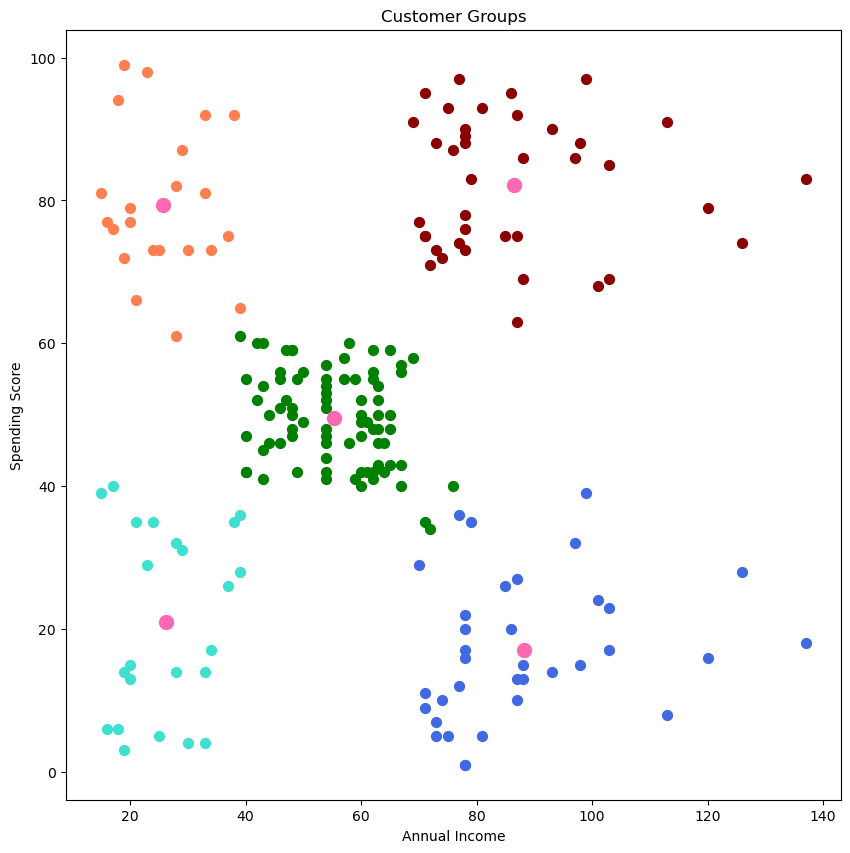

In [20]:
# plotting the clusters along with their centroids

#plotting the clusters -
plt.figure(figsize=(10,10))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='darkred',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='royalblue',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='Turquoise',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='Coral',label='Cluster 5')

# plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='hotpink', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

Evaluation

In [21]:
# we will go for the Silhoutte score to check the performance of the model.

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, Y)
silhouette_avg

# we can see the model has created moderate clusters for segmenting the customers.

0.553931997444648